In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car = pd.read_csv('../data/cleaned_car_price.csv')

In [3]:
car.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')

### Correlation Matrix

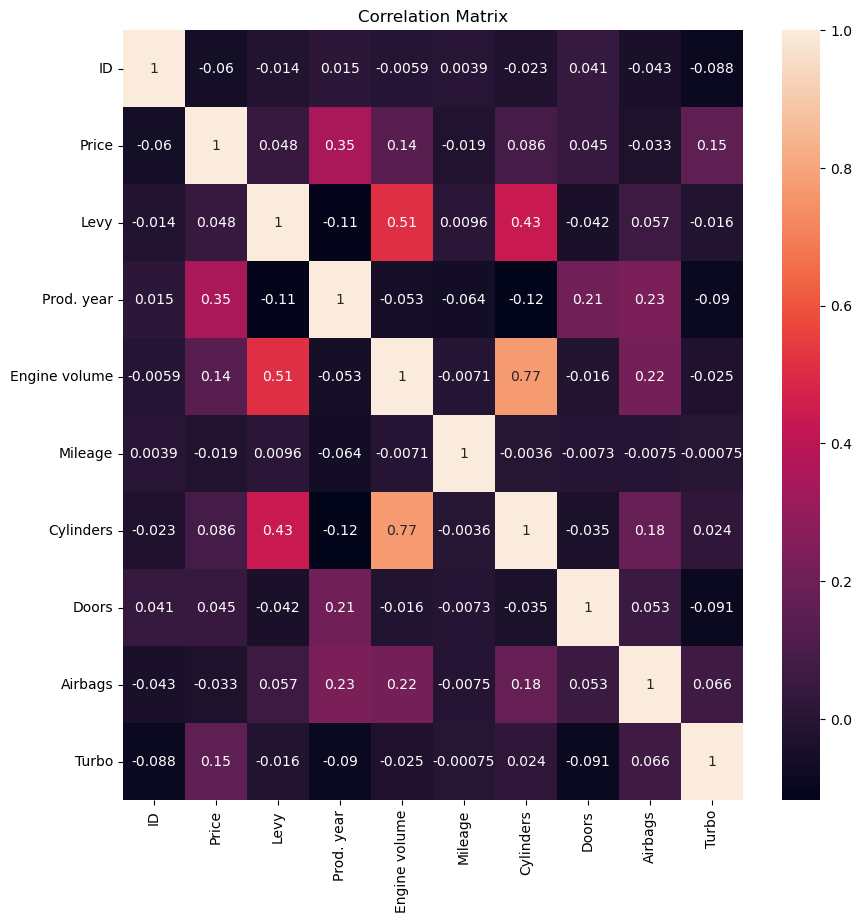

In [4]:
corr = car.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data = corr, annot = True)
plt.title('Correlation Matrix')
plt.show()

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17171 entries, 0 to 17170
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17171 non-null  int64  
 1   Price             17171 non-null  int64  
 2   Levy              17171 non-null  int64  
 3   Manufacturer      17171 non-null  object 
 4   Model             17171 non-null  object 
 5   Prod. year        17171 non-null  int64  
 6   Category          17171 non-null  object 
 7   Leather interior  17171 non-null  object 
 8   Fuel type         17171 non-null  object 
 9   Engine volume     17171 non-null  float64
 10  Mileage           17171 non-null  int64  
 11  Cylinders         17171 non-null  float64
 12  Gear box type     17171 non-null  object 
 13  Drive wheels      17171 non-null  object 
 14  Doors             17171 non-null  int64  
 15  Wheel             17171 non-null  object 
 16  Color             17171 non-null  object

###  Split Data into features and target datasets

In [6]:
X = car.drop(columns = ['Price', 'ID', 'Model'])
Y = np.log(car['Price'])

In [7]:
X

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,Four,4,Left wheel,Silver,12,0
1,1018,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,Four,4,Left wheel,Black,8,0
2,896,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,Four,4,Left wheel,White,0,0
4,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17166,1055,MERCEDES-BENZ,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4,Left wheel,Grey,12,0
17167,896,MERCEDES-BENZ,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,1
17168,831,HYUNDAI,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,0
17169,836,HYUNDAI,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,0


###  Split Data into train and test datasets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [9]:
X_train.shape

(13736, 16)

In [10]:
X_test.shape

(3435, 16)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.metrics import r2_score, mean_absolute_error

In [12]:
step1 = ColumnTransformer(transformers = [
    ('lr_col_tnf', OneHotEncoder(handle_unknown='ignore',sparse = False, drop = 'first'), [1,3,4,5,9,10,12,13]),
    ('log_tnf', FunctionTransformer(np.log1p), [0,7])
], remainder = 'passthrough')

In [13]:
from sklearn.linear_model import LinearRegression

lr_step2 = LinearRegression()

pipe_lr = Pipeline([
    ('step1', step1),
    ('lr_step2', lr_step2)
])

step1.fit_transform(X_test)

pipe_lr.fit(X_train, Y_train)

Y_pred = pipe_lr.predict(X_test)

print('R2 Score: ',r2_score(Y_test, Y_pred))
print('MAE: ', mean_absolute_error(Y_test, Y_pred))

R2 Score:  0.3139674137621319
MAE:  0.6574625784995299


C:\Users\Golden\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [14]:
from sklearn.linear_model import Ridge, Lasso

rd_step2 = Ridge(alpha = 10)

pipe_lr = Pipeline([
    ('step1', step1),
    ('rd_step2', rd_step2)
])

step1.fit_transform(X_test)

pipe_lr.fit(X_train, Y_train)

Y_pred = pipe_lr.predict(X_test)

print('R2 Score: ',r2_score(Y_test, Y_pred))
print('MAE: ', mean_absolute_error(Y_test, Y_pred))

R2 Score:  0.31383480484511384
MAE:  0.6568336916325727


C:\Users\Golden\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [15]:
ls_step2 = Lasso(alpha = 0.001)

pipe_lr = Pipeline([
    ('step1', step1),
    ('ls_step2', ls_step2)
])

step1.fit_transform(X_test)

pipe_lr.fit(X_train, Y_train)

Y_pred = pipe_lr.predict(X_test)

print('R2 Score: ',r2_score(Y_test, Y_pred))
print('MAE: ', mean_absolute_error(Y_test, Y_pred))

R2 Score:  0.30931298302720545
MAE:  0.6587809610411341


C:\Users\Golden\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(handle_unknown='ignore',sparse = False, drop = 'first'), [1,3,4,5,9,10,12,13]),
], remainder = 'passthrough')

rf_step2 = RandomForestRegressor(n_estimators = 300,
                                random_state = 3,
                                max_samples = 1.0,
                                max_features = 0.75,
                                max_depth = 15)

pipe_rf = Pipeline([
    ('rf_step1', rf_step1),
    ('rf_step2', rf_step2)
])

step1.fit_transform(X_test)

pipe_rf.fit(X_train, Y_train)

Y_pred = pipe_rf.predict(X_test)

print('R2 Score: ',r2_score(Y_test, Y_pred))
print('MAE: ', mean_absolute_error(Y_test, Y_pred))

C:\Users\Golden\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R2 Score:  0.7742242930508028
MAE:  0.3168989547306263


In [17]:
from xgboost import XGBRegressor

step2 = XGBRegressor(n_estimators = 45,
                    max_depth = 5,
                    learning_rate = 0.5)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

step1.fit_transform(X_test)

pipe.fit(X_train, Y_train)

Y_pred = pipe.predict(X_test)

print('R2 Score: ',r2_score(Y_test, Y_pred))
print('MAE: ', mean_absolute_error(Y_test, Y_pred))

R2 Score:  0.7124891612267402
MAE:  0.38716916382912486


C:\Users\Golden\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### Random Forest Model Feature Importance

In [18]:
feat_importance = pipe_rf.named_steps['rf_step2'].feature_importances_

In [19]:
col_names = pipe_rf.named_steps['rf_step1'].get_feature_names_out(input_features = X_train.columns)

In [20]:
feat_imp_df = pd.DataFrame({'feature': col_names, 'importance': feat_importance})

feat_imp_df = feat_imp_df.sort_values('importance', ascending = True)

feat_imp_df.head()

,feature,importance
44,col_tnf__Manufacturer_SATURN,1.565805e-07
16,col_tnf__Manufacturer_GREATWALL,1.420836e-06
45,col_tnf__Manufacturer_SCION,1.979297e-06
57,col_tnf__Manufacturer_ZAZ,3.297340e-06
22,col_tnf__Manufacturer_ISUZU,4.681209e-06


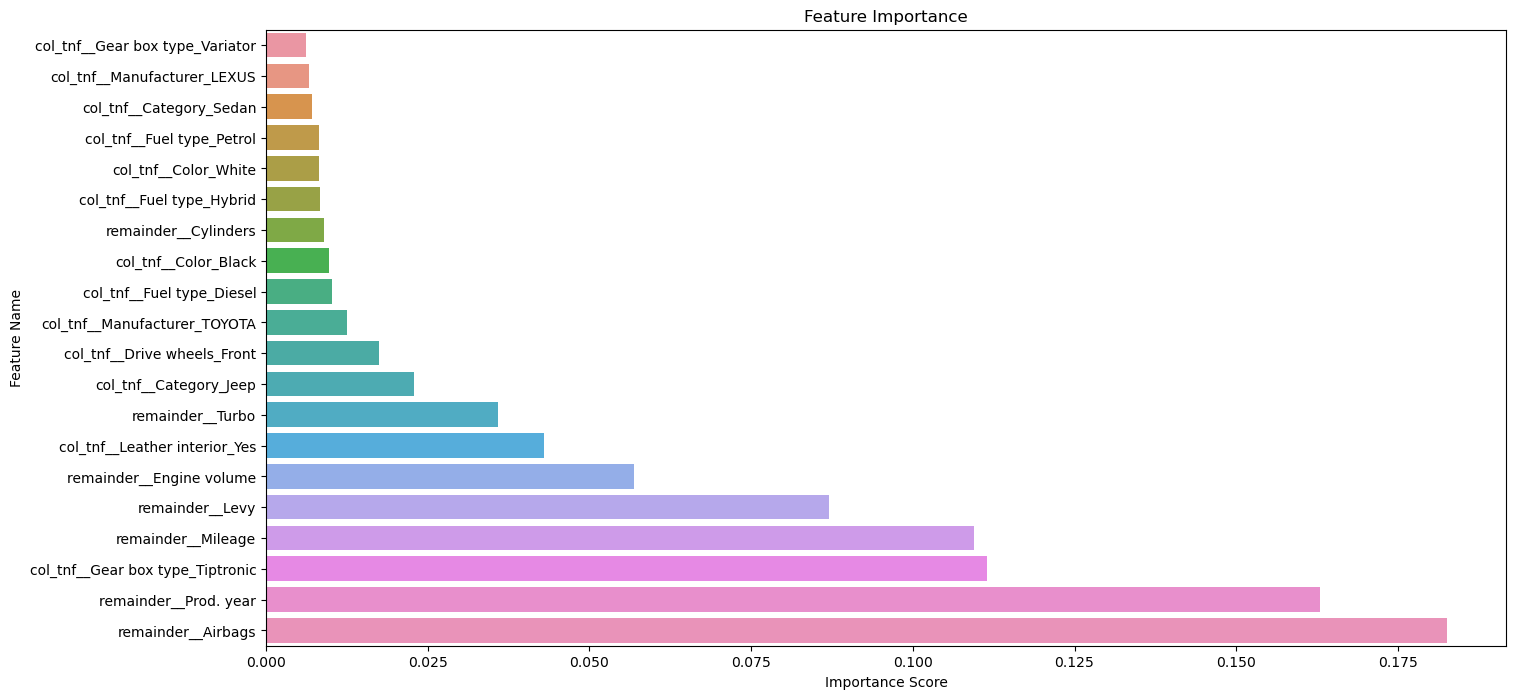

In [21]:
plt.figure(figsize= (16,8))
sns.barplot(x = 'importance', y = 'feature', data = feat_imp_df.tail(20))
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

#### Exporting model as pickle file

In [22]:
# import pickle
# pickle.dump(pipe_rf, open('new car pipe.pkl', 'wb'))
# pickle.dump(X_train, open('new car df.pkl','wb'))